In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import os

In [2]:
fp = os.path.join(os.getcwd(), "test_data", "animals.csv")
df = pd.read_csv(fp)
df.tail()

,Animal,Weight,Legs,Age,Name
1657,Hamster,0.502654,4,2,RON
1658,Hamster,0.441788,4,3,LUIGI
1659,Hamster,0.531533,4,2,KEITH
1660,Hamster,0.577304,4,2,CHIEF
1661,Hamster,0.581278,4,3,LIVADIA


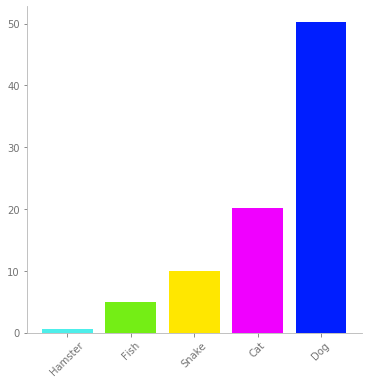

In [33]:
import itertools

neon_5 = ["#4deeea", "#74ee15", "#ffe700", "#f000ff", "#001eff"]
itfc_blue = "#1919A3"
spine_color = "#b3b3b3"
tick_color = "#737373"
spines = ["top", "bottom", "right", "left"]

def bar_chart(df: pd.DataFrame, category_col: str, data_col: str, sort="alpha", figsize=(6, 6), 
              ax=None, drop_spines: list = None, x_labels=True, x_rotation=90, colors=neon_5):
    
    assert sort in ["alpha", "asc", "desc"], f"Invalid sort arg: {sort}"
    assert all([s in spines for s in drop_spines])
    
    # Get & sort data:
    s = df.groupby(category_col)[data_col].mean()
    if sort == "alpha":
        s = s.sort_index()
    elif sort == "asc":
        s = s.sort_values(ascending=True)
    elif sort == "desc":
        s = s.sort_values(ascending=False)
    
    # Define colors for the plot:
    if isinstance(colors, list):
        colour = dict(zip(list(range(len(s))), itertools.cycle(colors)))
        colour = list(colour.values())
    elif isinstance(colors, str):
        colour = colors
    
    # Create the plot:
    if not ax:
        fig, ax = plt.subplots(figsize=figsize)
    ax.bar(x=range(len(s)), height=s.values, color=colour, width=0.8, bottom=[0 for _ in range(len(s))], align="center")
    
    # X-axis labels:
    if x_labels:
        ax.set_xticks(range(len(s)))
        ax.set_xticklabels(list(s.index), rotation=x_rotation)
    else:
        ax.set_xticks([])


    # Customise border spines:
    ax.tick_params(axis="x", colors=tick_color)
    ax.tick_params(axis="y", colors=tick_color)

    for loc in drop_spines:
        ax.spines[loc].set_visible(False)
    for loc in set(spines) - set(drop_spines):
        ax.spines[loc].set_color(spine_color)
    
    return ax
    
ax = bar_chart(df, category_col="Animal", data_col="Weight", sort="asc", drop_spines=["top", "right"],
               x_rotation=45, x_labels=True, colors=neon_5)